# 통계와 회계

In [5]:
!pip install matplotlib

In [8]:
import pandas as pd                                                                 # 엑셀 파일을 파이썬에서 다룰 수 있게 해줌
import statsmodels.api as sm                                                        # 회귀 분석을 가능하게 해줌
import matplotlib.pyplot as plt                                                     # 시각화를 가능하게 해줌
import numpy as np                                                                  # 선형 대수학을 가능하게 해줌
from statsmodels.stats.outliers_influence import variance_inflation_factor          # VIF 를 측정하기 위함
import random

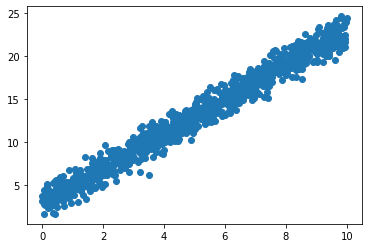

In [9]:
x1 = []
y1 = []
for i in range(1000):
    imsi = random.random() * 10
    x1.append(imsi)
    y1.append(2*imsi + 3 + random.gauss(0,1))            
plt.scatter(x1, y1)

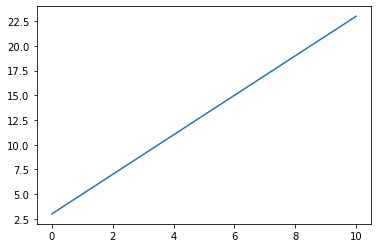

In [12]:
x2 = range(11)
y2 = [2 * n + 3 for n in range(11)]
plt.plot(x2, y2)

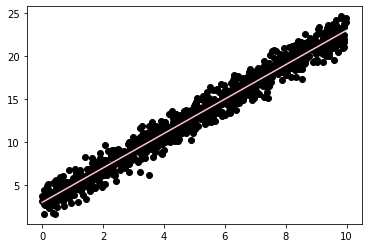

In [13]:
plt.scatter(x1, y1, c = "black")
plt.plot(x2, y2, c = "pink")
plt.show()

In [18]:
X = sm.add_constant(x1)
model = sm.OLS(y1,X)            # OLS:일반적인 분석방법  (종속변수, 독립변수)
result = model.fit()            # 주어진 조건으로 분석값을 계산

print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        17:05:02   Log-Likelihood:                -1397.9
No. Observations:                1000   AIC:                             2800.
Df Residuals:                     998   BIC:                             2810.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9744      0.065     45.870      0.0

In [19]:
x3 = range(11)
y3 = [1.9976 * n + 2.8605 for i in x3 ]

plt.scatter(x1, y1 ,c ="black")
plt.plot(x2, y2 ,c ="pink")
plt.plot(x3, y3 ,c ="blue")

plt.show()

NameError: name 'n' is not defined

In [20]:
score1 = 0 
score2 = 0 
for a, i in enumerate(x1):
    score1 += (y1[a] - (2 * i + 3)) **2
    score2 += (y1[a] - (1.9766 * i + 3.0640)) **2
print(score1/len(x1))
print(score1/len(x1))

0.958882516050734
0.958882516050734


# 다중공선성

In [34]:
x4 = []
x4_1 = []
y4 =[]
for i in range(1000):
    imsi = random.random() * 10
    x4.append(imsi)
    x4_1.append(imsi + random.gauss(0,1))
    y4.append(2*imsi + random.gauss(3,2))
    
df = {"x4" : x4, "x4_1" : x4_1, "y4" : y4}
df = pd.DataFrame(df)

x4 = df[["x4" , "x4_1"]]
y4 = df["y4"]

x4 = sm.add_constant(x4, has_constant = "add")
model = sm.OLS(y4, x4)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     y4   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     3824.
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        17:33:45   Log-Likelihood:                -2134.2
No. Observations:                1000   AIC:                             4274.
Df Residuals:                     997   BIC:                             4289.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9804      0.130     23.012      0.0

In [25]:
df.corrwith(df["x4"])

x4      1.000000
x4_1    0.943455
y4      0.945492
dtype: float64

In [27]:
df.corr()

,x4,x4_1,y4
x4,1.000000,0.943455,0.945492
x4_1,0.943455,1.000000,0.893896
y4,0.945492,0.893896,1.000000


In [35]:
for i in range(len(model.exog_names)):
    print(model.exog_names[i], variance_inflation_factor(model.exog, i))

const 3.9996507160734396
x4 8.287481323724213
x4_1 8.287481323724213
